In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Input Data

In [2]:
path = 'Data_Sales_year/'
frames = []
for file in os.listdir(path):
    filepath = path + file
    df1 = pd.read_csv(filepath)
    frames.append(df1)
    df = pd.concat(frames)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Sale hàng tháng

In [3]:
#Tạo thêm 1 cột Month chỉ chứa giá trị tháng
df['Month'] = df['Order Date'].str.slice(0,2,1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [4]:
print(set(df['Month']))

{nan, '11', '07', '04', '05', '10', '01', 'Or', '06', '03', '12', '08', '09', '02'}


In [5]:
#Loại bỏ giá trị nan và Or trong bảng
df = df.dropna(subset= ['Month'])
df = df[df['Month'] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [6]:
df['Month'] = pd.to_numeric(df['Month'], downcast='integer')
print(df['Month'])

0        10
1        10
2        10
3        10
4        10
         ..
11681     9
11682     9
11683     9
11684     9
11685     9
Name: Month, Length: 157980, dtype: int8


In [7]:
#Loại bỏ các hàng có tháng 1 và 4
df = df[df.Month != 4]
df = df[df.Month != 1]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [8]:
print(set(df['Month']))

{2, 3, 5, 6, 7, 8, 9, 10, 11, 12}


In [9]:
#Chuyển từ dạng Object sang dạng số cột Quantity Ordered và Price Each
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='integer')
#Tính tổng sale hàng tháng
df['Sale'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [10]:
#Tính tổng sale hàng tháng
Sale_value_month = df.groupby('Month')['Sale'].sum()
Sale_value_month

Month
2     2.200274e+06
3     2.807100e+06
5     3.142047e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sale, dtype: float64

In [11]:
#di chuyển cột Sale để dễ dàng quan sát
moving_column = df.pop('Sale')
df.insert(4, 'Sale', moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,5.98,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


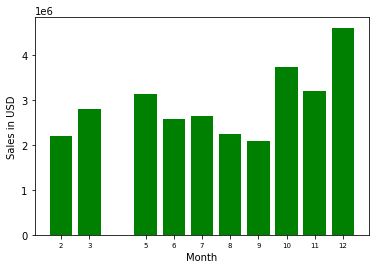

In [12]:
#Vẽ biểu đồ thể hiện lượng Sale hàng tháng
Months  = [Month for Month, sale in Sale_value_month.items()]
plt.bar(x=Months, height=Sale_value_month, color='g')
plt.hist(Months, rwidth=1)
plt.xticks(Months, rotation=0, size=7)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

### Lượng sale ở các thành phố

In [13]:
#Lấy các giá trị thứ nhất sau dấu phẩy ở cột Purchase Address
address_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_city)
df

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,City
0,259358,34in Ultrawide Monitor,1,379.99,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,Dallas
1,259359,27in 4K Gaming Monitor,1,389.99,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,Los Angeles
2,259360,AAA Batteries (4-pack),2,2.99,5.98,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,New York City
3,259361,27in FHD Monitor,1,149.99,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,New York City
4,259362,Wired Headphones,1,11.99,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco


In [14]:
#Tính tổng lượng sản phẩm được bán ra trên từng thành phố
sum_item_city = df.groupby('City').sum()['Quantity Ordered']
#Tính tổng lượng sale trên từng thành phố
sum_sale_city = df.groupby('City').sum()['Sale']
sum_item_city

City
 Atlanta          14090.0
 Austin            9479.0
 Boston           19158.0
 Dallas           14329.0
 Los Angeles      28171.0
 New York City    23672.0
 Portland         11961.0
 San Francisco    42590.0
 Seattle          14133.0
Name: Quantity Ordered, dtype: float64

In [15]:
sum_sale_city

City
 Atlanta          2.361874e+06
 Austin           1.558811e+06
 Boston           3.105616e+06
 Dallas           2.369354e+06
 Los Angeles      4.612393e+06
 New York City    3.954178e+06
 Portland         1.964377e+06
 San Francisco    7.009538e+06
 Seattle          2.330659e+06
Name: Sale, dtype: float64

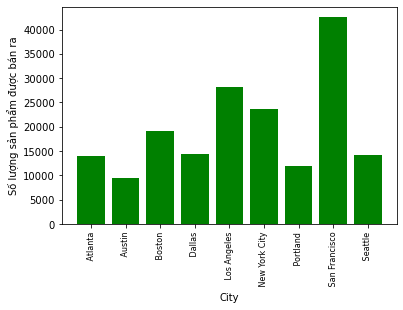

In [16]:
#Vẽ biểu đồ thể hiện lượng tổng sản phẩm được bán ra ở từng thành phố
Cyties  = [City for City, sale in sum_item_city.items()]
plt.bar(x=Cyties, height=sum_item_city, color='g')
plt.hist(Cyties, rwidth=1)
plt.xticks(Cyties, rotation=90, size=8)
plt.xlabel('City')
plt.ylabel('Số lượng sản phẩm được bán ra')
plt.show()

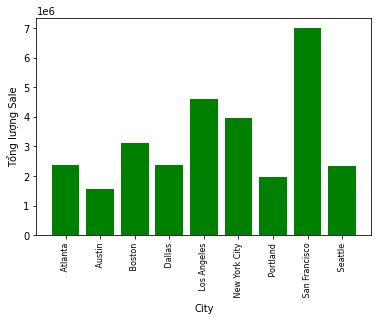

In [17]:
#Vẽ biểu đồ thể lượng sale ở từng thành phố
Cyties  = [City for City, sale in sum_sale_city.items()]
plt.bar(x=Cyties, height=sum_sale_city, color='g')
plt.hist(Cyties, rwidth=1)
plt.xticks(Cyties, rotation=90, size=8)
plt.xlabel('City')
plt.ylabel('Tổng lượng Sale')
plt.show()

### Danh sách doanh thu của sản phẩm được bán ra

In [18]:
Product_item = df.groupby(['Product']).sum()['Quantity Ordered']
Product_item

Product
20in Monitor                   3516.0
27in 4K Gaming Monitor         5365.0
27in FHD Monitor               6390.0
34in Ultrawide Monitor         5230.0
AA Batteries (4-pack)         23386.0
AAA Batteries (4-pack)        26477.0
Apple Airpods Headphones      13318.0
Bose SoundSport Headphones    11505.0
Flatscreen TV                  4115.0
Google Phone                   4632.0
LG Dryer                        529.0
LG Washing Machine              563.0
Lightning Charging Cable      19687.0
Macbook Pro Laptop             4036.0
ThinkPad Laptop                3518.0
USB-C Charging Cable          20416.0
Vareebadd Phone                1722.0
Wired Headphones              17405.0
iPhone                         5773.0
Name: Quantity Ordered, dtype: float64

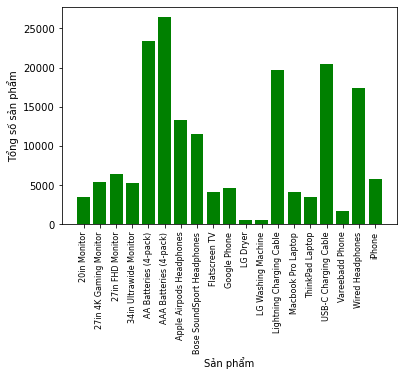

In [19]:
#Vẽ biểu đồ thể hiện số lượng sản phẩm được bán ra
Products  = [Product for Product, sale in Product_item.items()]
plt.bar(x=Products, height=Product_item, color='g')
plt.hist(Products, rwidth=1)
plt.xticks(Products, rotation=90, size=8)
plt.xlabel('Sản phẩm')
plt.ylabel('Tổng số sản phẩm')
plt.show()

In [20]:
#Tìm sản phẩm có doanh thu cao nhất
Sales_item = df.groupby(['Product']).sum()['Sale']
Sales_item

Product
20in Monitor                   386724.84
27in 4K Gaming Monitor        2092296.35
27in FHD Monitor               958436.10
34in Ultrawide Monitor        1987347.70
AA Batteries (4-pack)           89802.24
AAA Batteries (4-pack)          79166.23
Apple Airpods Headphones      1997700.00
Bose SoundSport Headphones    1150384.95
Flatscreen TV                 1234500.00
Google Phone                  2779200.00
LG Dryer                       317400.00
LG Washing Machine             337800.00
Lightning Charging Cable       294320.65
Macbook Pro Laptop            6861200.00
ThinkPad Laptop               3517964.82
USB-C Charging Cable           243971.20
Vareebadd Phone                688800.00
Wired Headphones               208685.95
iPhone                        4041100.00
Name: Sale, dtype: float64

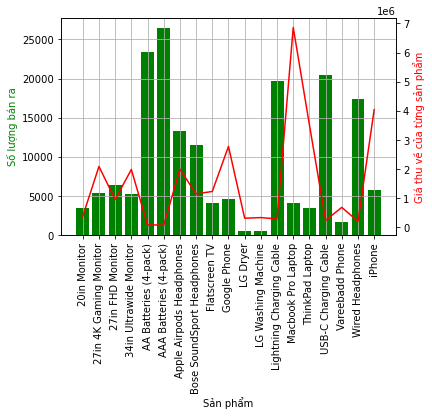

In [21]:
x = Products
y1 = Product_item
y2 = Sales_item

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'r-')

ax1.grid()
ax1.set_xticks(Products)
ax1.set_xticklabels(Products, rotation=90)
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Số lượng bán ra', color='g')
ax2.set_ylabel('Giá thu về của từng sản phẩm', color='r')

plt.show()